<div class="alert alert-block alert-success">
    
<h2> Purpose </h2> 

The assignment aims at familiarizing Boombikes with the factors that influence their bike renting business.This will ensure Boombikes understands the factors affecting the demand of shared bikes in the American Market. The company would be given adequate information on -
    
<p>1. Which variables are significant in predicting the demand for shared bikes. <p>

<p>2. How well those variables describe the bike demands. <p>

</div>

<div class="alert alert-block alert-info">

<h2> Dataset used </h2>

<b> day.csv </b> - contains all the information of the number of bikes that were rented through 2018 & 2019 with additional information like temperature, season, wind speed, etc. specific to the day of renting.

In [1]:
# Filtering out the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing necessary libraries for analysis
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
# Import Libraries for Regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [4]:
# Additional - Add command to display complete contents of a dataframe without any kind of truncation
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

# Note : This is useful especially during inspection of dataframe

<div class="alert alert-block alert-info">
<h2> Step 1: Data Sourcing </h2>
<div>

In [5]:
# Let's import the dataset
bike_df = pd.read_csv('day.csv')

In [6]:
# Reading the dataset to make sure it is properly imported
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


<div class="alert alert-block alert-warning">

We'll first analyze and clean up the application_df and bike_df. This brings us to the next step of EDA.
    
</div>

<div class="alert alert-block alert-info">

<h2> Step 2: Data Cleansing </h2>

<div>

<div class="alert alert-block alert-success">
<h3> 2.1 Dataframe Inspection </h3>

In [7]:
bike_df.shape

# This df has 730 rows and 16 columns

(730, 16)

In [8]:
# Taking a quick glance at the different column types in the dataset. 
bike_df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [9]:
#basic information about the numeric columns
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


<div class="alert alert-block alert-success">
<h3> 2.2 Attribute Cleansing </h3>

<div class="alert alert-block alert-warning">

<h4> 1. Column Elimination through Null Identification and Removal </h4> <br>
    <br>
        One way is to identify the null columns and dropping columns that have more than <b> 50% </b> null values <br>
        since they wouldn't be helpful in analysis
    
</div>

In [10]:
# From the inspection step it appears that all the columns have non-null values, 
# so looks like null values don't need to be dealt with. Let's confirm the same

bike_df.isna().sum()
#Assumption is confirmed, moving on to the next step

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
#checking the number of unique values in each column of the dataset
bike_df.nunique()

instant       730
dteday        730
season        4  
yr            2  
mnth          12 
holiday       2  
weekday       7  
workingday    2  
weathersit    3  
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

<div class="alert alert-block alert-warning">

<h4> 2. Removal of additional columns </h4> <br>
    <br>
        There are some columns which appear redundant, and might have low correlation with the target variable. Having them in our dataset would be more of a hindrance than help. Since the column numbers are relatively low, we do have a hunch
on what those might be. <br>
    <br>
          a. <b>instant</b> - This is a key field and will not give us much insight. Also, since there are no dataframes that we               <br> reference using this one, this can be dropped. <br>
         b. <b>dteday</b> - We do not need to drill down to a date level. <br>
             From date, we would need month and year, which are already supplied as separate columns, so we can drop this.
    
    
</div>

In [12]:
# Dropping these two columns and re-examining the dataframe
bike_df.drop(['instant', 'dteday'], axis =1, inplace = True)

<div class="alert alert-block alert-success>
   There are some columns which appear redundant, and might have low correlation with the target variable. Having them <br>    our dataset would be more of a hindrance than help. Since the column numbers are relatively low, we do have a hunch <br>
    on what those might be. <br>
    <br>
          a. <b>instant</b> - This is a key field and will not give us much insight. Also, since there are no dataframes that we               <br> reference using this one, this can be dropped. <br>
         b. <b>dteday</b> - We do not need to drill down to a date level. <br>
             From date, we would need month and year, which are already supplied as separate columns, so we can drop this.
    
    
</div>

<div class="alert alert-block alert-info">

Looking at the dataframe some more, we do see that there are three numerical metrices - <b> casual, registered, cnt </b> that could potentially be the target variable(s). <br>
   <br>
While <b> casual </b> and <b> registered </b> give us count of casual users and registered users respectively, what we actually need in this case is the total count, which is given by the <b> cnt </b> variable. So we keep this variable as our <b> target variable </b>and drop the other two. 
    
    
</div>

In [13]:
# Dropping the mentioned columns
bike_df.drop(['casual', 'registered'], axis =1, inplace = True)

In [14]:
#Checking df shape
bike_df.shape

(730, 12)

In [15]:
# Checking current set of columns 
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


<div class="alert alert-block alert-warning">

<h4> 3. Assessing Correlation between independent variables </h4> <br>
    <br>
    Let us check if there are two independent variables that are closely related to each other
</div>

In [16]:

# checking correlation for the contact no. email, etc columns
bike_df_temp=bike_df[['season','yr', 'mnth', 'holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed']]
bike_df_corr=bike_df_temp.corr()
bike_df_corr

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,0.004012,0.017868,0.021306,0.333361,0.342014,0.208220,-0.229607
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,0.000685,-0.011852,-0.050322,0.048789,0.047215,-0.112547,-0.011624
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,-0.004059,-0.010414,0.045613,0.219083,0.226430,0.224937,-0.208013
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.020145,-0.257009,-0.034395,-0.028764,-0.032703,-0.015662,0.006257
weekday,4.012478e-03,6.852851e-04,-4.059002e-03,-0.020145,1.000000,0.001588,0.034216,0.044876,0.037964,0.008780,-0.017230
workingday,1.786841e-02,-1.185197e-02,-1.041372e-02,-0.257009,0.001588,1.000000,-0.026332,0.002044,0.010657,0.053770,-0.002453
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.034216,-0.026332,1.000000,-0.119503,-0.120559,0.590277,0.039769
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,0.044876,0.002044,-0.119503,1.000000,0.991696,0.128565,-0.158186
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,0.037964,0.010657,-0.120559,0.991696,1.000000,0.141512,-0.183876
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,0.008780,0.053770,0.590277,0.128565,0.141512,1.000000,-0.248506


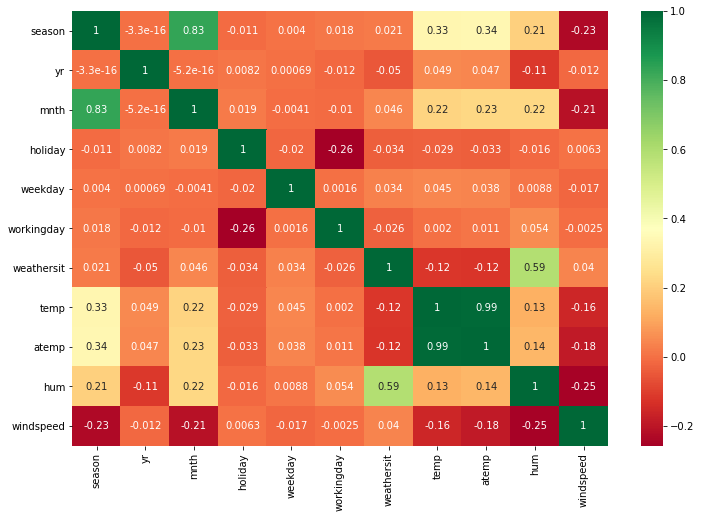

In [17]:
# Plotting Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(bike_df_corr,annot=True,cmap='RdYlGn')
plt.show()

<div class="alert alert-block alert-danger">
Alert: We do see <b> temp </b> and <b> atemp </b> are very closely related with each other. It is clear that a model that containing both temp and atemp will be a biased one. So we'll have to drop either of them. However, let us examine the VIFs and P-values of both these variables at a later stage to find out which variable needs to be dropped.
</div>

In [18]:
# Checking shape
bike_df.shape

(730, 12)

In [19]:
# displaying bike df
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


<div class="alert alert-block alert-success">
<h3> 2.3 Data Visualization </h3>

<div class="alert alert-block alert-process">
<h4> Data Type Conversion </h4>

In [20]:
# Let us re-visit the datatype of each columns

bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [21]:
# Changing Data types of Category Fields

#converting the object variables into categorical variables
bike_df['season']=bike_df['season'].astype('category')
bike_df['weathersit']=bike_df['weathersit'].astype('category')
bike_df['mnth']=bike_df['mnth'].astype('category')
bike_df['weekday']=bike_df['weekday'].astype('category')

bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


<div class="alert alert-block alert-process">
<h4> Visualizing Numerical Variables </h4>

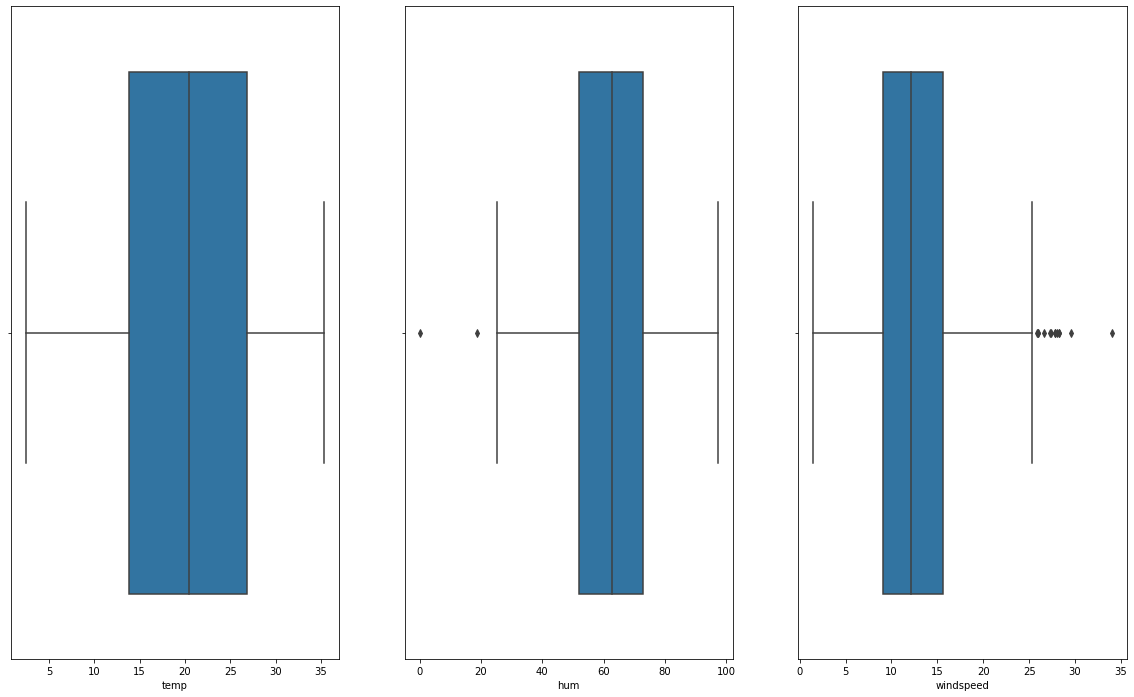

In [22]:
# Checking Outliers using box plot on numerical fields


plt.figure(figsize=(20, 12))
plt.subplot(1,3,1)
sns.boxplot(bike_df['temp'])
plt.subplot(1,3,2)
sns.boxplot(bike_df['hum'])
plt.subplot(1,3,3)
sns.boxplot(bike_df['windspeed'])
plt.show()


<div class="alert alert-block alert-warning">
The numerical fields do not have significant outliers, and hence do not need to be handled separately

<Figure size 1080x2160 with 0 Axes>

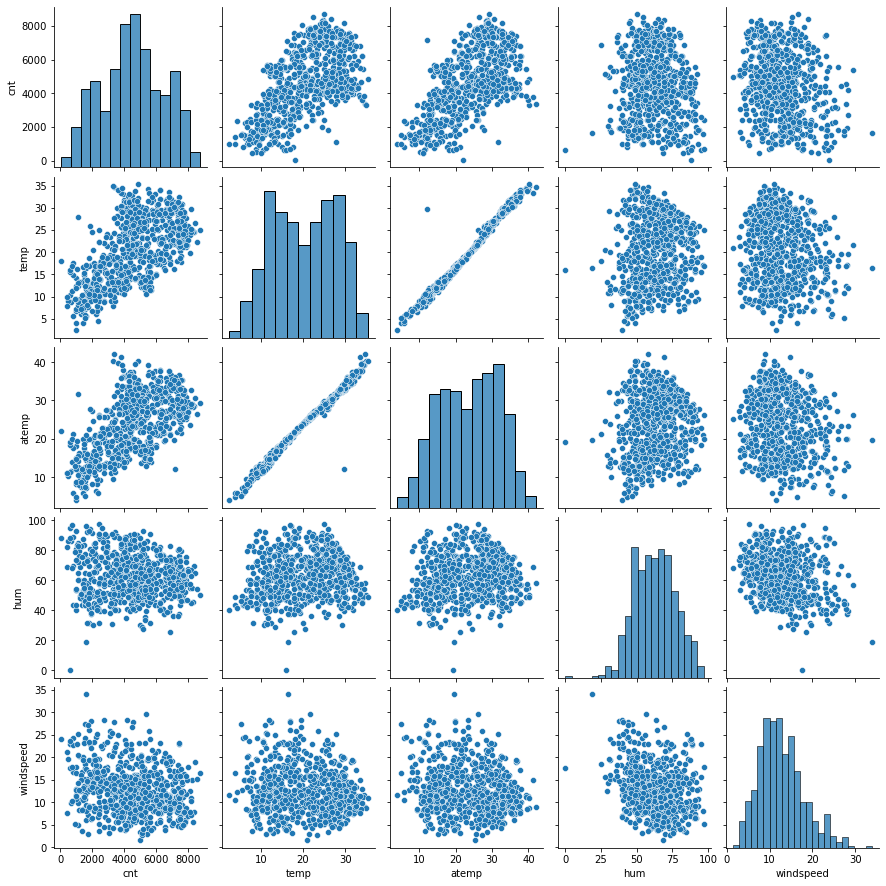

In [23]:
# Plotting Pairplots to #check the relationship between the nummeric variables and the target variable to see if linear relationship is present
plt.figure(figsize = (15,30))
sns.pairplot(data=bike_df,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

<div class="alert alert-block alert-warning">
<b> Observations: </b> <br>
1. Our Target Variable Cnt shows good linear relationship with temp and atemp <br>
2. As discovered earlier the temp and atemp variables are strongly correlated. So one of them needs to be dropped

<div class="alert alert-block alert-process">
<h4> Visualizing Categorical Variables </h4>

In [24]:
#convert the categorical variables into the proper format
bike_df['season'].replace({1:'Spring',2:'Summer',3:'Fall',4:'Winter'},inplace=True)
bike_df['weathersit'].replace({1:'Clear',2:'Cloudy/Misty',3:'Rainy/Snowy',4:'Bad'},inplace=True)
bike_df['mnth'].replace({1: 'January',2: 'February',3: 'March',4: 'April',5: 'May',6: 'June',
                                 7: 'July',8: 'August',9: 'September',10: 'October',
                                 11: 'November',12: 'December'},inplace=True)
bike_df['weekday'].replace({0: 'Sunday',1: 'Monday',2: 'Tuesday',3: 'Wednesday',4: 'Thursday',
                                    5: 'Friday',6: 'Saturday'},inplace=True)

bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,January,0,Monday,1,Cloudy/Misty,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,January,0,Tuesday,1,Cloudy/Misty,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,January,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,January,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,January,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


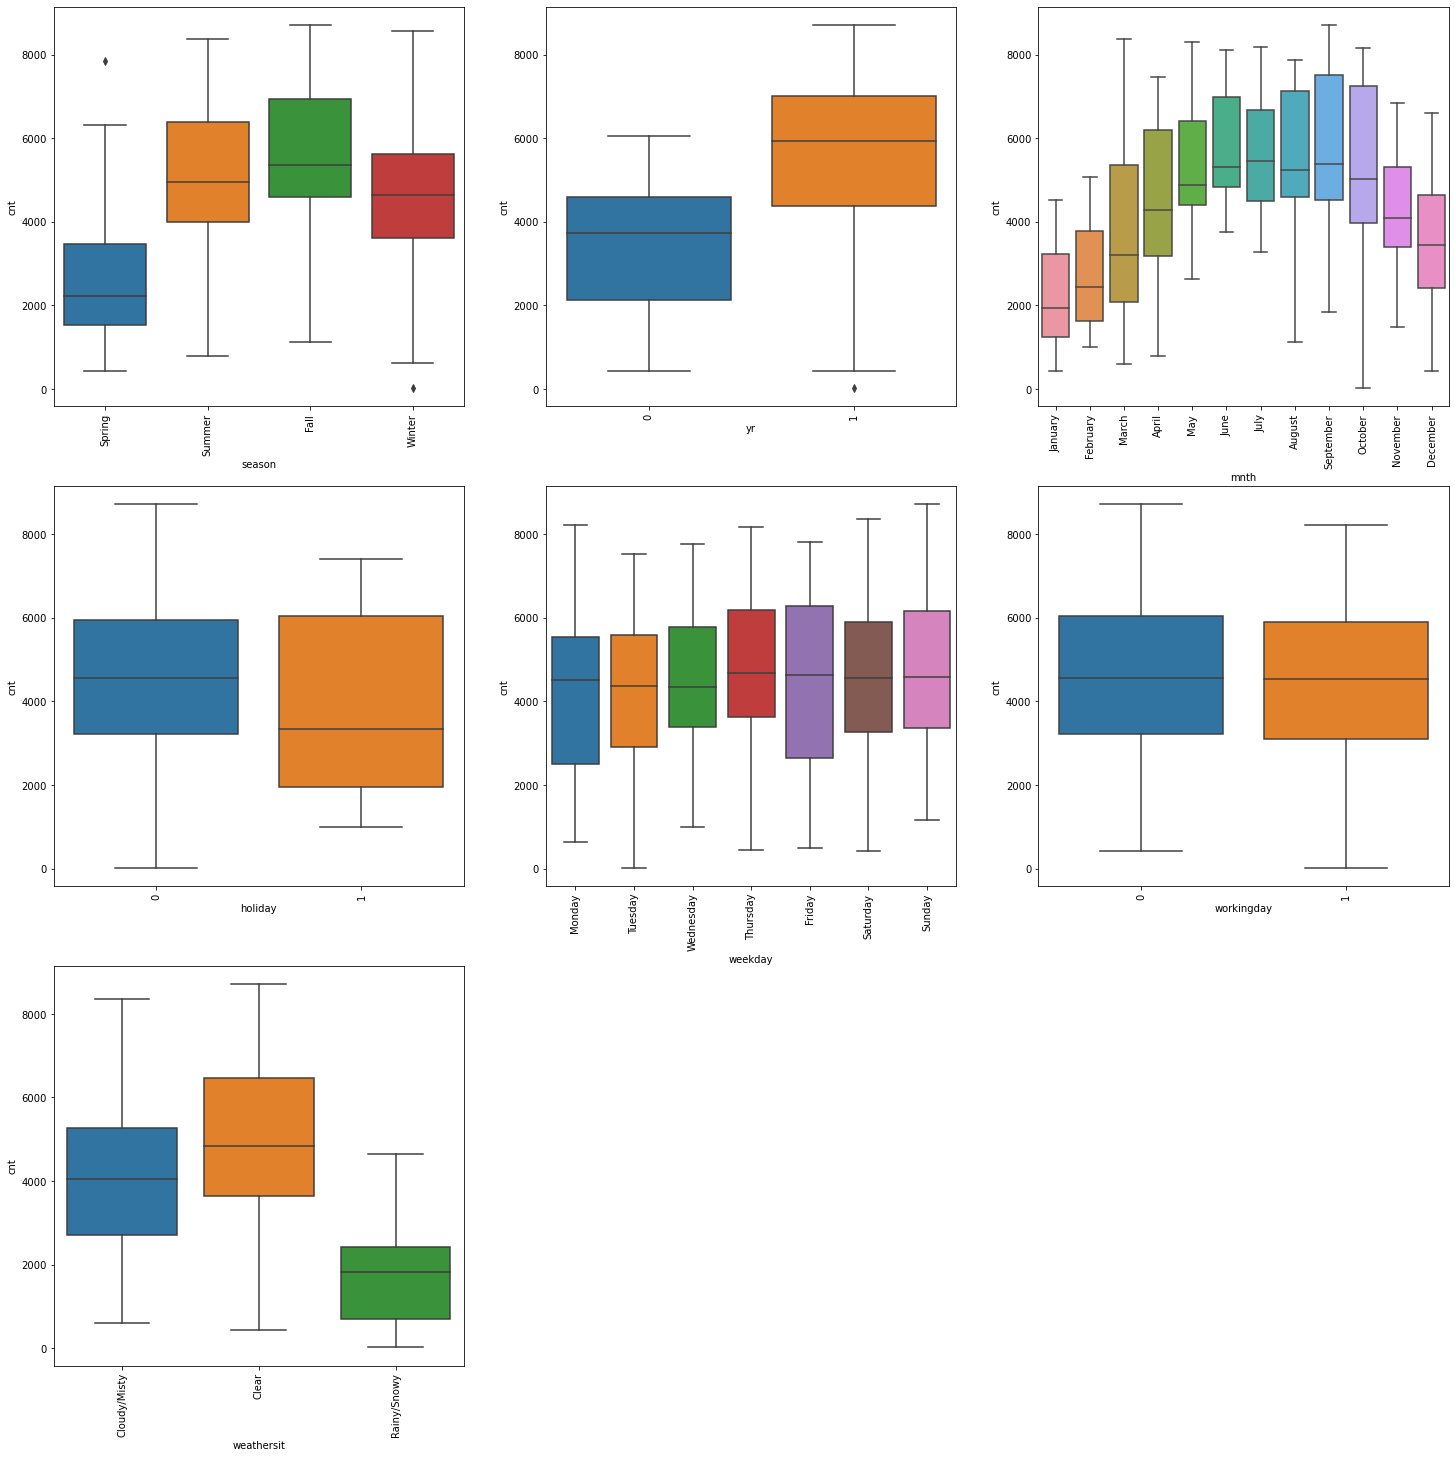

In [25]:
#checking the relationship between the categorical variables and the target variable
categorical_cols = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(25, 25))
for i in enumerate(categorical_cols):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bike_df, x=i[1], y='cnt')
    plt.xticks(rotation=90)
plt.show()

<div class="alert alert-block alert-warning">
<b>Observations: </b> <br>
1. The demand is highest during fall and least during spring <br>
2. The bike demand has increased considerably in 2019, as compared to 2018 <br>
3. No bikes are rented during weather corresponding to category 4 (Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog) <br>
4. The median number of bikes rented is more on weekdays than on weekends - stating that the prime target population of the bike renting is the working professionals.

<div class="alert alert-block alert-info">

<h2> Step 3: Data Preparation </h2>

<div>

<div class="alert alert-block alert-success">

<h3> 3.1: Creating Dummy Variables</h3>

<div>

<div class="alert alert-block alert-warning">

Now that the categorical values have been converted to text, let us create dummy variables for them <br>
    Note: The <b> weatherisit </b> variable needs to be treated a litle differently than the others.
</div>

In [26]:
# creating dummy variables for season , mnth ,weekday
dummy = bike_df[['season','mnth','weekday']]

In [27]:
dummy = pd.get_dummies(dummy,drop_first=True)
dummy

#Here we see the n-1 dummy variables created for the categorical field with n categories

,season_Spring,season_Summer,season_Winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
6,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
7,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
8,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
9,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


<div class="alert alert-block alert-warning">

For the weatherisit variable, from the data produced, we see that though the data dictionary specifies it to be having 4 categories - the data that is present in the dataframe only has 3 categories. For the other category-variables we used drop-first variables which gave us n-1 dummies for n-categories. But here we'll want all the categories to feature in the dummies. This is because for any unseen dataset that might be using our model, there could potentially be data present for the 4th category and we'd need to make allowances for that in our model. 
</div>

In [28]:
dummy_weathersit_df=bike_df[['weathersit']]
dummy_weathersit_df=pd.get_dummies(dummy_weathersit_df)

dummy_weathersit_df

,weathersit_Clear,weathersit_Cloudy/Misty,weathersit_Rainy/Snowy
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0
6,0,1,0
7,0,1,0
8,1,0,0
9,1,0,0


In [29]:
# Concatenating the dummy dataframes to original one
bike_df=pd.concat([bike_df,dummy],axis=1)
bike_df=pd.concat([bike_df,dummy_weathersit_df],axis=1)

In [30]:
## dropping columns for which dummy variables were created
bike_df.drop(['season', 'mnth', 'weekday','weathersit'], axis = 1, inplace = True)

In [31]:
bike_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Clear,weathersit_Cloudy/Misty,weathersit_Rainy/Snowy
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [32]:
# Checking info on new datset
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   yr                       730 non-null    int64  
 1   holiday                  730 non-null    int64  
 2   workingday               730 non-null    int64  
 3   temp                     730 non-null    float64
 4   atemp                    730 non-null    float64
 5   hum                      730 non-null    float64
 6   windspeed                730 non-null    float64
 7   cnt                      730 non-null    int64  
 8   season_Spring            730 non-null    uint8  
 9   season_Summer            730 non-null    uint8  
 10  season_Winter            730 non-null    uint8  
 11  mnth_August              730 non-null    uint8  
 12  mnth_December            730 non-null    uint8  
 13  mnth_February            730 non-null    uint8  
 14  mnth_January             7

<div class="alert alert-block alert-success">

<h3> 3.4: Divide Data into Train and Test</h3>

<div>

<div class="alert alert-block alert-warning">

In order to apply Linear Regression Algorithm, we need to break the data into train and test data set.<br>
Here we'll split the whole dataset into <b>70-30</b> percentage ratio for train and test respectively using the train_test_split function.
</div>

In [33]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike_df, train_size = 0.7, test_size = 0.3, random_state = 42)

In [34]:
#Let us check the size of each df

# Checking the original df first
bike_df.shape #730 rows, 31 columns 

(730, 31)

In [35]:
# checking the train df
df_train.shape #510 rows, 31 columns

(510, 31)

In [36]:
# checking the test df
df_test.shape # 219 rows, 31 columns

(219, 31)

In [37]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Clear,weathersit_Cloudy/Misty,weathersit_Rainy/Snowy
683,1,0,1,13.188347,16.22460,62.0417,10.250129,5445,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
645,1,1,0,15.716653,19.38040,70.9583,12.708493,5478,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
163,0,0,1,26.035000,30.08270,49.4583,20.458450,5020,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0
360,0,0,1,13.325000,16.38165,76.2500,12.626150,1162,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
640,1,0,1,26.957500,29.95665,79.3750,4.458569,7572,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0


<div class="alert alert-block alert-warning">

Split into Test-train is successful.
</div>

<div class="alert alert-block alert-success">

<h3> 3.5: Perform Scaling</h3>

<div>

<div class="alert alert-block alert-process">

Let us look at what attributes need to be scaled
</div>

In [38]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Clear,weathersit_Cloudy/Misty,weathersit_Rainy/Snowy
683,1,0,1,13.188347,16.22460,62.0417,10.250129,5445,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
645,1,1,0,15.716653,19.38040,70.9583,12.708493,5478,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
163,0,0,1,26.035000,30.08270,49.4583,20.458450,5020,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0
360,0,0,1,13.325000,16.38165,76.2500,12.626150,1162,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
640,1,0,1,26.957500,29.95665,79.3750,4.458569,7572,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0


<div class="alert alert-block alert-process">

It appears that the numeric attributes need to be scaled. <br>
We'll use the <b>MinMax Scaling</b> technique to scale the following attributes: <br>
1. temp
2. atemp
3. hum
4. windspeed
5. cnt


</div>

In [39]:
scaler = MinMaxScaler()

In [40]:
# Apply scaler() to all the mentioned columns
cols_to_scale = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_train[cols_to_scale] = scaler.fit_transform(df_train[cols_to_scale])

In [41]:
# Checking the output
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Clear,weathersit_Cloudy/Misty,weathersit_Rainy/Snowy
683,1,0,1,0.327133,0.322150,0.639330,0.327101,0.605336,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0.609320,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0.554026,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0
360,0,0,1,0.331287,0.326273,0.785745,0.415925,0.088253,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0.862127,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0


In [42]:
# Checking the range of numeric variables 
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Clear,weathersit_Cloudy/Misty,weathersit_Rainy/Snowy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.521569,0.027451,0.698039,0.551091,0.526680,0.653801,0.414566,0.498206,0.231373,0.256863,0.250980,0.074510,0.074510,0.074510,0.088235,0.092157,0.084314,0.062745,0.092157,0.092157,0.090196,0.090196,0.149020,0.143137,0.133333,0.135294,0.156863,0.133333,0.625490,0.345098,0.029412
std,0.500025,0.163554,0.459559,0.227401,0.213153,0.143542,0.185671,0.233905,0.422124,0.437332,0.434003,0.262857,0.262857,0.262857,0.283915,0.289531,0.278131,0.242742,0.289531,0.289531,0.286744,0.286744,0.356457,0.350557,0.340268,0.342373,0.364028,0.340268,0.484471,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354176,0.352585,0.544033,0.281934,0.345950,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575824,0.564951,0.659296,0.383964,0.502233,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745338,0.698389,0.756762,0.525698,0.677080,0.000000,1.000000,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<div class="alert alert-block alert-warning">

Scaling is successful and all attributes are now restricted to a value in the 0-1 range.
</div>

<div class="alert alert-block alert-success">

<h3> 3.5: Split into X & y</h3>

<div>

<div class="alert alert-block alert-process">
We'd need to split the dataset into X & y to be able to apply the Linear Regression Algorithms. The y value will be our target variable (cnt), and the preliminary X would be the dataframe with all other columns.

In [43]:
y_train = df_train.pop('cnt')
X_train = df_train

In [44]:
# Inspecting the dfs
y_train.head()

683    0.605336
645    0.609320
163    0.554026
360    0.088253
640    0.862127
Name: cnt, dtype: float64

In [45]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_Spring,season_Summer,season_Winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Clear,weathersit_Cloudy/Misty,weathersit_Rainy/Snowy
683,1,0,1,0.327133,0.322150,0.639330,0.327101,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0
360,0,0,1,0.331287,0.326273,0.785745,0.415925,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0


In [46]:
X_train.shape

(510, 30)

<div class="alert alert-block alert-info">

<h2> Step 4: Data Modelling </h2>

<div>

<div class="alert alert-block alert-success">
<h3> 4.1 Running RFE to select the most influencing variables </h3>

<div class="alert alert-block alert-process">
    Let us start off by selecting the <b>top 15 </b> attributes

In [47]:
# Create RFE Object
lr_rfe = LinearRegression()
lr_rfe.fit(X_train,y_train)
rfe = RFE(lr_rfe,15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [48]:
# display columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 11),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', False, 8),
 ('season_Winter', True, 1),
 ('mnth_August', False, 13),
 ('mnth_December', True, 1),
 ('mnth_February', False, 9),
 ('mnth_January', False, 15),
 ('mnth_July', True, 1),
 ('mnth_June', False, 10),
 ('mnth_March', True, 1),
 ('mnth_May', False, 2),
 ('mnth_November', True, 1),
 ('mnth_October', False, 4),
 ('mnth_September', True, 1),
 ('weekday_Monday', False, 5),
 ('weekday_Saturday', False, 12),
 ('weekday_Sunday', False, 14),
 ('weekday_Thursday', False, 16),
 ('weekday_Tuesday', False, 7),
 ('weekday_Wednesday', False, 6),
 ('weathersit_Clear', True, 1),
 ('weathersit_Cloudy/Misty', False, 3),
 ('weathersit_Rainy/Snowy', True, 1)]

In [49]:
#selecting the columns returned by RFE
rfe_cols=X_train.columns[rfe.support_]
rfe_cols

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'season_Spring',
       'season_Winter', 'mnth_December', 'mnth_July', 'mnth_March',
       'mnth_November', 'mnth_September', 'weathersit_Clear',
       'weathersit_Rainy/Snowy'],
      dtype='object')

In [50]:
#printing the columns discarded by RFE
X_train.columns[~rfe.support_]

Index(['workingday', 'season_Summer', 'mnth_August', 'mnth_February',
       'mnth_January', 'mnth_June', 'mnth_May', 'mnth_October',
       'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday',
       'weathersit_Cloudy/Misty'],
      dtype='object')

In [51]:
#creating the first dataset to be used for model building using statsmodels
X_train_rfe=X_train[rfe_cols]
X_train_rfe.head()

,yr,holiday,temp,atemp,hum,windspeed,season_Spring,season_Winter,mnth_December,mnth_July,mnth_March,mnth_November,mnth_September,weathersit_Clear,weathersit_Rainy/Snowy
683,1,0,0.327133,0.322150,0.639330,0.327101,0,1,0,0,0,1,0,0,0
645,1,1,0.403972,0.404998,0.731215,0.419004,0,1,0,0,0,0,0,0,0
163,0,0,0.717562,0.685963,0.509660,0.708724,0,0,0,0,0,0,0,1,0
360,0,0,0.331287,0.326273,0.785745,0.415925,1,0,1,0,0,0,0,0,0
640,1,0,0.745598,0.682653,0.817947,0.110593,0,1,0,0,0,0,0,0,0


<div class="alert alert-block alert-success">
<h3> 4.2 Create Linear Regression Model </h3>

<div class="alert alert-block alert-warning">
From this point onwards, we'll be working on model building, which would be an iterative process which would comprise of calculating the <b> VIF </b> and computing the summary of the <b> OLS best fitted model </b> with <b> p-value assessments </b>

In [52]:
#creating a common function for model buildimg using statsmodels api
def create_model(df):
    X_train_sm = sm.add_constant(df)
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [53]:
#creating a function to calculate the variance inflation factor
def calculate_vif(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

<div class="alert alert-block alert-info">
    <b> Building Model 1 </b>
</div>

In [54]:
model_1=create_model(X_train_rfe)
model_1

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     172.9
Date:                Sat, 19 Mar 2022   Prob (F-statistic):          1.74e-185
Time:                        16:40:29   Log-Likelihood:                 485.12
No. Observations:                 510   AIC:                            -938.2
Df Residuals:                     494   BIC:                            -870.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [55]:
calculate_vif(X_train_rfe)

                  Features      VIF
3   atemp                   1244.69
2   temp                    1208.53
4   hum                     20.45  
5   windspeed               5.52   
13  weathersit_Clear        3.28   
6   season_Spring           3.04   
7   season_Winter           2.82   
0   yr                      2.09   
11  mnth_November           1.86   
9   mnth_July               1.49   
8   mnth_December           1.38   
12  mnth_September          1.25   
14  weathersit_Rainy/Snowy  1.19   
10  mnth_March              1.18   
1   holiday                 1.05   


<div class="alert alert-block alert-warning">
    <b>Observations:</b> <br>
    1. Both atemp and temp have high VIF and P-Value <br>
    2. But considering that they also have strong linear relationship with the target variable and are strongly correlated to each other, we will drop just one of them<br>

<div class="alert alert-block alert-info">
    <b> Building Model 2 </b>
</div>

In [56]:
# Let us try building temporary models by removing both temp & atemp and see which gives us more favorable metrices

# Going with removing temp first
X_train_rfe_temp = X_train_rfe.drop('temp', axis =1)
model_2_temp1=create_model(X_train_rfe_temp)
calculate_vif(X_train_rfe_temp)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.6
Date:                Sat, 19 Mar 2022   Prob (F-statistic):          1.28e-186
Time:                        16:40:29   Log-Likelihood:                 485.10
No. Observations:                 510   AIC:                            -940.2
Df Residuals:                     495   BIC:                            -876.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [57]:

# Removing atemp now
X_train_rfe_atemp = X_train_rfe.drop('atemp', axis =1)
model_2_temp2=create_model(X_train_rfe_atemp)
calculate_vif(X_train_rfe_atemp)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Sat, 19 Mar 2022   Prob (F-statistic):          4.32e-186
Time:                        16:40:29   Log-Likelihood:                 483.84
No. Observations:                 510   AIC:                            -937.7
Df Residuals:                     495   BIC:                            -874.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

<div class="alert alert-block alert-warning">
    <b>Observations:</b> <br>
While the adjusted R2 (0.835) is same irrespective of whichever variable is removed, the highest VIF (temp - 19.48) is a little lower when atemp is removed in comparison to the highest VIF (atemp = 20.06) when temp is removed.
<br>
So for our 2nd model, we'll remove atemp

In [58]:
X_train_rfe.drop(['atemp'],axis=1,inplace=True)

X_train_rfe.shape

(510, 14)

In [59]:
#building model in recursive steps
model_2=create_model(X_train_rfe)
model_2

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Sat, 19 Mar 2022   Prob (F-statistic):          4.32e-186
Time:                        16:40:29   Log-Likelihood:                 483.84
No. Observations:                 510   AIC:                            -937.7
Df Residuals:                     495   BIC:                            -874.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [60]:
#checking the VIF of the model
calculate_vif(X_train_rfe)

                  Features    VIF
2   temp                    19.48
3   hum                     19.19
4   windspeed               5.18 
12  weathersit_Clear        3.20 
5   season_Spring           3.04 
6   season_Winter           2.79 
0   yr                      2.09 
10  mnth_November           1.86 
8   mnth_July               1.49 
7   mnth_December           1.38 
11  mnth_September          1.24 
9   mnth_March              1.17 
13  weathersit_Rainy/Snowy  1.17 
1   holiday                 1.05 


<div class="alert alert-block alert-warning">
    <b>Observations:</b> <br>
1. P-value looks good for all independent variables <br>
2. temp and hum have high VIF values that are very close to each other <br>
3. However, from our earlier pairplots and correlation heatmap, we found that temp has a stonger correlation with the target variable. 
<br>
So we'll try removing hum in model 3 and see if it changes anything.

<div class="alert alert-block alert-info">
    <b> Building Model 3 </b>
</div>

In [61]:
X_train_rfe.drop(['hum'],axis=1,inplace=True)

X_train_rfe.shape

(510, 13)

In [62]:
model_3=create_model(X_train_rfe)
model_3

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     191.9
Date:                Sat, 19 Mar 2022   Prob (F-statistic):          6.15e-184
Time:                        16:40:30   Log-Likelihood:                 475.97
No. Observations:                 510   AIC:                            -923.9
Df Residuals:                     496   BIC:                            -864.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [63]:
#checking the VIF of the model
calculate_vif(X_train_rfe)

                  Features   VIF
2   temp                    6.24
3   windspeed               5.04
11  weathersit_Clear        2.83
5   season_Winter           2.36
0   yr                      2.09
4   season_Spring           1.93
9   mnth_November           1.82
7   mnth_July               1.43
6   mnth_December           1.32
10  mnth_September          1.24
8   mnth_March              1.17
12  weathersit_Rainy/Snowy  1.12
1   holiday                 1.04


<div class="alert alert-block alert-warning">
    <b>Observations:</b> <br>
1. P-value looks good for all independent variables <br>
2. temp is still on the higher side (VIF >5) <br>
<br>
So for our 4th model, we'll remove temp

<div class="alert alert-block alert-info">
    <b> Building Model 4 </b>
</div>

In [64]:
#lets drop temp now and rebuild model
X_train_rfe.drop(['temp'],axis=1,inplace=True)

X_train_rfe.shape

(510, 12)

In [65]:
model_4=create_model(X_train_rfe)
model_4

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     154.3
Date:                Sat, 19 Mar 2022   Prob (F-statistic):          6.04e-159
Time:                        16:40:30   Log-Likelihood:                 413.86
No. Observations:                 510   AIC:                            -801.7
Df Residuals:                     497   BIC:                            -746.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [66]:
calculate_vif(X_train_rfe)

                  Features   VIF
2   windspeed               3.20
10  weathersit_Clear        2.39
4   season_Winter           2.34
0   yr                      1.93
8   mnth_November           1.77
3   season_Spring           1.68
5   mnth_December           1.32
6   mnth_July               1.21
7   mnth_March              1.16
9   mnth_September          1.15
11  weathersit_Rainy/Snowy  1.12
1   holiday                 1.04


<div class="alert alert-block alert-warning">
    <b>Observations:</b> <br>
1. We see that R-squared and adjusted R-squared fall significantly on dropping the temp variable <br>
2. So lets drop windspeed and retain temp and try again

<div class="alert alert-block alert-info">
    <b> Building Model 5 </b>
</div>

In [67]:
X_train_rfe.drop(['windspeed'],axis=1,inplace=True)
X_train_rfe=pd.concat([X_train_rfe,X_train['temp']],axis=1)

X_train_rfe.shape

(510, 12)

In [68]:
model_5=create_model(X_train_rfe)
model_5

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     200.6
Date:                Sat, 19 Mar 2022   Prob (F-statistic):          9.63e-182
Time:                        16:40:30   Log-Likelihood:                 467.99
No. Observations:                 510   AIC:                            -910.0
Df Residuals:                     497   BIC:                            -854.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [69]:
calculate_vif(X_train_rfe)

                  Features   VIF
11  temp                    3.95
9   weathersit_Clear        2.80
3   season_Winter           2.34
0   yr                      2.07
7   mnth_November           1.79
2   season_Spring           1.54
5   mnth_July               1.39
4   mnth_December           1.32
8   mnth_September          1.23
6   mnth_March              1.17
10  weathersit_Rainy/Snowy  1.08
1   holiday                 1.04


<div class="alert alert-block alert-warning">
    <b>Observations:</b> <br>
This model looks balanced with P-values of all independent variables below 0.05 and VIF under 5. <br>
<br>
    <b>We'll be considering this as our final model </b>

####  Looking at some key statistics from the summary

The values we are concerned with are -

The coefficients and significance (p-values)
R-squared
F statistic and its significance

1. <b> The coefficient of all independent variables are very low, along with their p-values </b> - The highest p-value of any attribute in the model is 0.004 , which signifies that the model is statistically significant. 

2. <b> R - squared is 0.829</b> - Meaning that 82.9%  of the variance in Rented Bike Counts is explained by the model. This is a decent R-squared value. 

3. <b>  F statistic has a very low p-value (practically 0) </b> - Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

<div class="alert alert-block alert-success">
<h3> 4.3 Residual Analysis of the train data </h3>

<div class="alert alert-block alert-process">
So, now to check if the error terms are also normally distributed (one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [70]:
#since the statsmodel api doesn't have a constant by default, let us quickly create a Linear regression object using sklearn
#and try to fit our model into it
lr_sklearn=LinearRegression()
lr_sklearn.fit(X_train_rfe,y_train)

LinearRegression()

In [71]:
y_train_pred = lr_sklearn.predict(X_train_rfe)

In [72]:
#R-squared value for the training dataset using sklearn
r2_score(y_train,y_train_pred)

0.8288947856118909

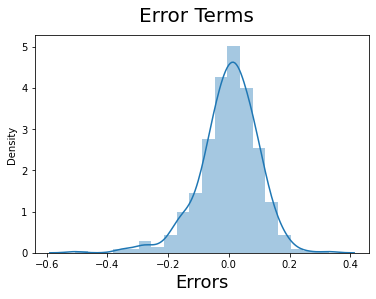

In [73]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  
plt.show()

<div class="alert alert-block alert-warning">
    <b>Observations:</b> <br>
The residuals are normally distributed with a mean of 0.

<div class="alert alert-block alert-info">

<h2> Step 5: Model Evaluation and Predictions </h2>

<div>

##### We will now be evaluating our model against the test dataset

In [74]:
df_test.head() # Printing the test df

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Clear,weathersit_Cloudy/Misty,weathersit_Rainy/Snowy
468,1,0,0,20.295000,24.39980,50.2917,12.791439,7460,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
148,0,0,1,27.367500,30.77750,81.8750,14.333846,4788,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
302,0,0,1,13.085847,16.06645,62.3750,11.833339,3331,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
355,0,0,0,17.356653,21.30605,75.7500,3.167425,3068,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
515,1,0,1,27.880000,31.56645,49.2917,13.083693,7338,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [75]:
df_test.shape # To find out the dimensions of test dataframe

(219, 31)

In [76]:
df_test.describe() #checking out the statistical summary of test_df

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Clear,weathersit_Cloudy/Misty,weathersit_Rainy/Snowy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.452055,0.031963,0.671233,19.780141,23.066174,61.092246,13.150063,4403.136986,0.283105,0.237443,0.228311,0.109589,0.109589,0.082192,0.077626,0.068493,0.077626,0.136986,0.068493,0.059361,0.073059,0.063927,0.132420,0.141553,0.164384,0.159817,0.114155,0.164384,0.657534,0.315068,0.027397
std,0.498836,0.176306,0.470841,7.565815,8.218533,14.807055,5.691017,1930.694541,0.451539,0.426491,0.420705,0.313092,0.313092,0.275286,0.268194,0.253169,0.268194,0.344621,0.253169,0.236840,0.260830,0.245183,0.339723,0.349389,0.371472,0.367276,0.318728,0.371472,0.475622,0.465607,0.163612
min,0.000000,0.000000,0.000000,3.993043,5.896500,18.791700,3.125550,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.085847,15.940600,50.508150,9.021114,2798.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,19.133347,22.852300,59.041700,12.652213,4334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.325403,30.047100,71.413050,15.792336,5766.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,34.371653,39.741450,97.250000,34.000021,8555.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [77]:
df_test.info() #printing metadata information on test_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 468 to 314
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   yr                       219 non-null    int64  
 1   holiday                  219 non-null    int64  
 2   workingday               219 non-null    int64  
 3   temp                     219 non-null    float64
 4   atemp                    219 non-null    float64
 5   hum                      219 non-null    float64
 6   windspeed                219 non-null    float64
 7   cnt                      219 non-null    int64  
 8   season_Spring            219 non-null    uint8  
 9   season_Summer            219 non-null    uint8  
 10  season_Winter            219 non-null    uint8  
 11  mnth_August              219 non-null    uint8  
 12  mnth_December            219 non-null    uint8  
 13  mnth_February            219 non-null    uint8  
 14  mnth_January            

#### For a start, we'll repeat the scaling step with the test data set

In [78]:
# Apply scaler() to all the mentioned columns
cols_to_scale = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_test[cols_to_scale] = scaler.transform(df_test[cols_to_scale])


In [79]:
df_test.describe() #Scaling has been performed successfully

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Clear,weathersit_Cloudy/Misty,weathersit_Rainy/Snowy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.452055,0.031963,0.671233,0.527468,0.501760,0.629546,0.435511,0.479553,0.283105,0.237443,0.228311,0.109589,0.109589,0.082192,0.077626,0.068493,0.077626,0.136986,0.068493,0.059361,0.073059,0.063927,0.132420,0.141553,0.164384,0.159817,0.114155,0.164384,0.657534,0.315068,0.027397
std,0.498836,0.176306,0.470841,0.229936,0.215759,0.152584,0.212750,0.233091,0.451539,0.426491,0.420705,0.313092,0.313092,0.275286,0.268194,0.253169,0.268194,0.344621,0.253169,0.236840,0.260830,0.245183,0.339723,0.349389,0.371472,0.367276,0.318728,0.371472,0.475622,0.465607,0.163612
min,0.000000,0.000000,0.000000,0.047675,0.051010,0.193646,0.060760,-0.049378,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.324018,0.314694,0.520479,0.281156,0.285826,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.507811,0.496145,0.608416,0.416900,0.471206,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.726388,0.685028,0.735901,0.534288,0.644151,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.970925,0.939531,1.002146,1.214955,0.980804,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### We'll then split the dataset into X & y datasets

In [80]:
y_test = df_test.pop('cnt')
X_test = df_test

In [81]:
y_test.head()

468    0.848606
148    0.526017
302    0.350115
355    0.318363
515    0.833877
Name: cnt, dtype: float64

In [82]:
X_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_Spring,season_Summer,season_Winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Clear,weathersit_Cloudy/Misty,weathersit_Rainy/Snowy
468,1,0,0,0.543115,0.536771,0.518248,0.422104,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
148,0,0,1,0.758058,0.704203,0.843709,0.479765,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
302,0,0,1,0.324018,0.317998,0.642765,0.386287,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
355,0,0,0,0.453814,0.455552,0.780592,0.062325,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
515,1,0,1,0.773634,0.724915,0.507943,0.433030,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


#### Applying prediction on y_test using only the columns included in the final model

In [83]:
cols_to_choose = X_train_rfe.columns
y_test_pred=lr_sklearn.predict(X_test[cols_to_choose])

#### Calculating the R2 score on the test dataset

In [84]:
r2_score(y_test,y_test_pred)

0.8094824561372584

#### Let's now plot the graph for actual versus predicted values

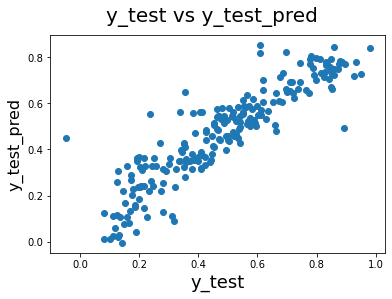

In [85]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)
plt.show()

<div class="alert alert-block alert-warning">
    <b>Observations and Inferences: </b> <br>
1. The R2 score of the test dataset is 0.809, which implies that the model explains 80.9% of variance in number of bikes rented in the test dataset <br>
2. The R2 score of train and test dataset have a difference of less than 5%, which proves that the model built on the train set is a good one. <br>
3. The y-test vs y_test_pred graph follow a linear pattern, further attributing to the success of our model. <br>
4. The top 3 features inlfuencing bike rents are - 
    
   - Temperature: coeff 0.4287.
   - Year: coeff 0.2414
   - Season_Winter (season = 4): coeff 0.0940

   

<div class="alert alert-block alert-success">
    <b>Equation of best fit line: </b> <br>

The best-fit line for this problem is as follows: 
    
$ cnt = 0.1129 + 0.2414   \times yr - 0.0709  \times holiday - 0.1590   \times
season\_Spring + 0.0940   \times season\_Winter - 0.0605   \times mnth\_December - 0.0505   \times mnth\_July + 0.0569   \times mnth\_March  - 0.0825   \times mnth\_November + 0.0519   \times mnth\_September + 0.0844   \times weathersit\_Clear - 0.2027   \times weathersit\_Rainy/Snowy + 0.4287   \times temp $              

<div class="alert alert-block alert-info">

<h2> Step 6: Conclusions </h2>

<div>

#### The following conslusions can be drawn from this exercise of model building and predicting:

1. Overall we have a decent model, but ideally we'd want to reduce the number of independent variables to 10 or lower (Currently we have 12)
2. We could try advanced non-linear regression algorithms to further enhance the model